In [24]:
import cmath
import numpy as np

In [88]:
import matplotlib.pyplot as plt

def arg(z):
    return np.sqrt(z.real**2 + z.imag**2)

def comp_to_xy(z):
    return np.array([z.real, z.imag])

def mandlebrot_plot(z0, n, num_iters):
    """
    Args:
        z (complex): initial value in mandlebrot set
        c (float): c value for the mandlebrot set
        n (int): The power for Z in the mandlebrot set
    """
    z = z0
    x = [z.real]
    y = [z.imag]
    
    for i in range(num_iters):
        z = z**n + z0
        x.append(z.real)
        y.append(z.imag)
    x = np.array(x)
    y = np.array(y)
    
    plt.plot(x,y)
    plt.show()
    
def is_mandlebrot(z, n):
    z0=z
    running = True
    
    if arg(z) > 2:
        return False, 0
    
    while running:
        for i in range(100):
            z = z**n + z0
            if arg(z)>2:
                return False, i+1
        return True, None
    
    
def mandleplot(x_range, y_range, steps, n):
    """
    Args:
        x_range (list): A list for the max and min x values in the format [xmin, xmax]
        y_range (list): A list for the max and min x values in the format [ymin, ymax]
        steps (int): the number of steps for use in the np linspace, eg 100 being 100 values in the x, y intervals
        n (int): the power for use within the mandlebrot set
    """
    x = np.linspace(x_range[0], x_range[1], steps)
    y = np.linspace(y_range[0], y_range[1], steps)
    
    is_lst =[]
    is_not_lst = []
    values_dict = {'yes':[]}
    
    for i in x:
        for j in y:
            z = complex(i,j)
            a, b = is_mandlebrot(z, n)
            if a:
                values_dict['yes'].append(comp_to_xy(z))
            else:
                if b in list(values_dict.keys()):
                    values_dict[b].append(comp_to_xy(z))
                else:
                    values_dict[b] = [comp_to_xy(z)]
                    
    for key in values_dict:
        
        values_dict[key] = np.array(values_dict[key])
        if key == 'yes':
            plt.scatter(values_dict[key][:, 0], values_dict[key][:, 1], color = (1,0,0))
        else:
            plt.scatter(values_dict[key][:, 0], values_dict[key][:, 1], color = (key/100,0,0))
    
    plt.show()
    
    return values_dict

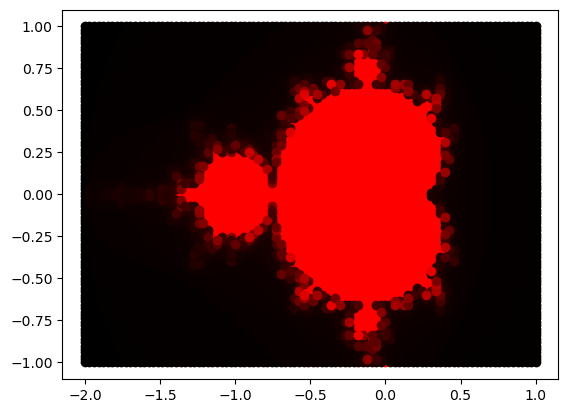

In [106]:
x = mandleplot(x_range = [-2,1], y_range = [-1,1], steps = 100, n = 2)